In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set_context('talk')
sns.set_style('darkgrid')

In [84]:
# update with your filpath to location of 'annual_state_summs_2010_2016.csv'
filepath = '../scratch_data/pdf_extracts/resulting_csvs/'
all_states = pd.read_csv(filepath + 'annual_state_summs_2010_2016.csv')

In [85]:
all_states.head(1)

,state,wildfires,wild_acres,rx_fires,rx_acres,year
0,AZ,"1,543","205,199",133.0,"64,905",2014


In [86]:
#re-feng shui dataframe for easy plotting
all_states.rename(columns = {'wildfires':'wild_ct', 'rx_fires':'rx_ct'}, inplace=True)
vert_all = pd.melt(all_states, id_vars=['year', 'state'], value_vars=['wild_ct', 'wild_acres',
                                                           'rx_ct','rx_acres'],
                 var_name='measure', value_name='value')

In [87]:
vert_all[['firetype', 'metric']] = vert_all['measure'].str.split('_', expand=True) 

In [88]:
vert_all.drop(columns = ['measure'], inplace=True)
vert_all = vert_all[['year', 'state', 'firetype', 'metric', 'value']]

In [89]:
vert_all.isnull().sum()

year        0
state       0
firetype    0
metric      0
value       0
dtype: int64

In [90]:
# vert_all.info() 
#'value' col cast as object but turns out some values are str and some are floats
# make all str to drop special characters, recast

vert_all['value'] = vert_all['value'].astype('str')
vert_all['value'] = vert_all['value'].str.replace(',','').astype('float')


In [92]:
vert_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      196 non-null    int64  
 1   state     196 non-null    object 
 2   firetype  196 non-null    object 
 3   metric    196 non-null    object 
 4   value     196 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.8+ KB


In [124]:
vert_all.metric.value_counts()

ct       98
acres    98
Name: metric, dtype: int64

/Users/helenmeigs/miniforge3/lib/python3.9/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/helenmeigs/miniforge3/lib/python3.9/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/helenmeigs/miniforge3/lib/python3.9/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/helenmeigs/miniforge3/lib/python3.9/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/helenmeigs/miniforge3/lib/python3.9/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.

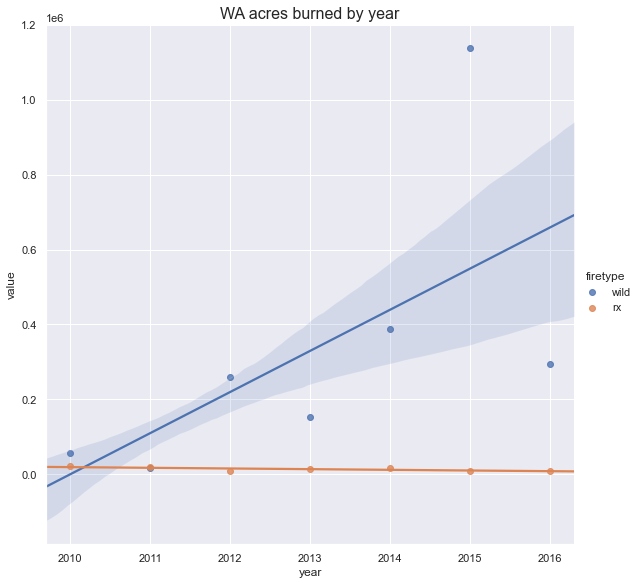

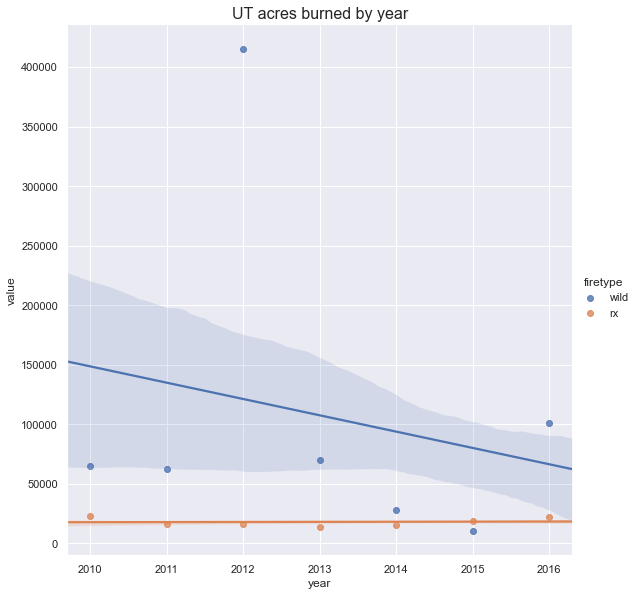

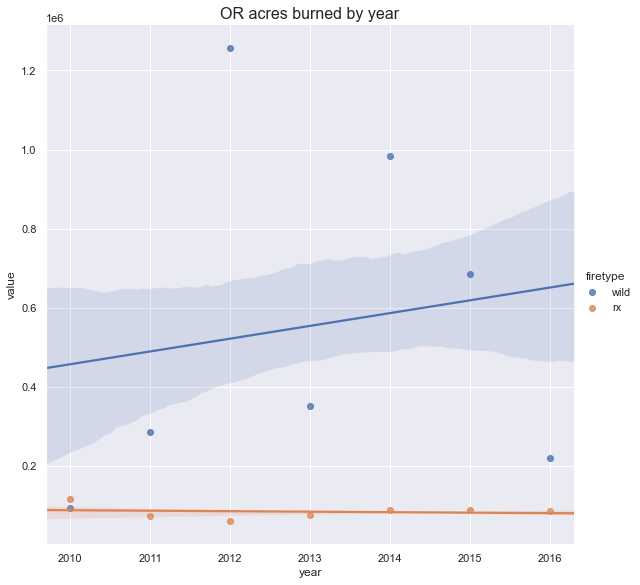

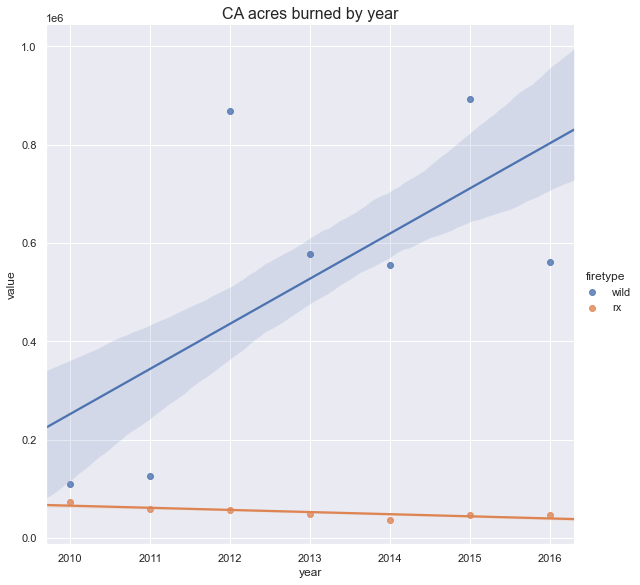

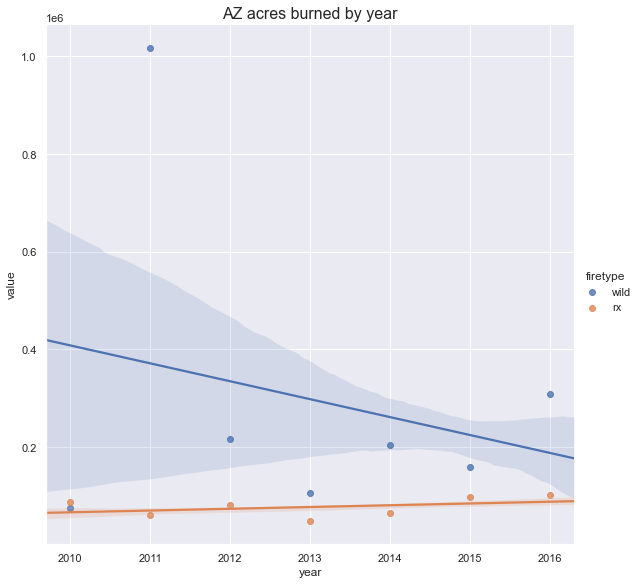

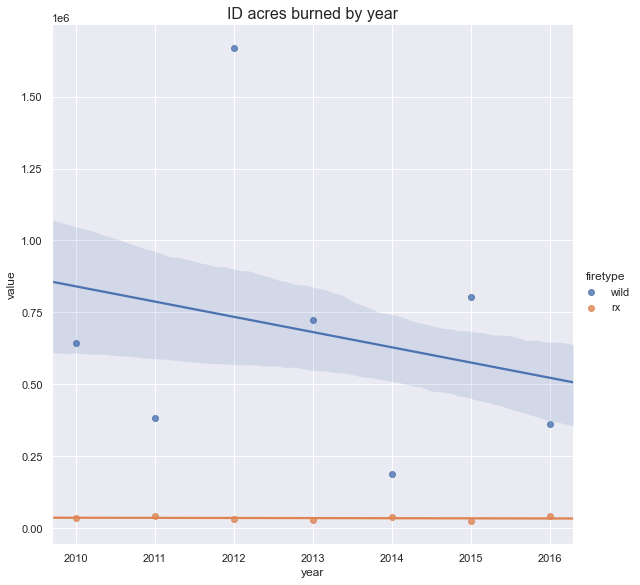

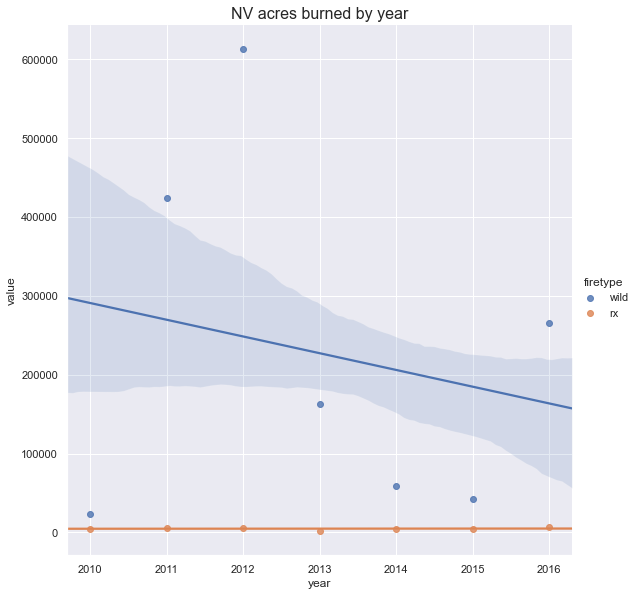

In [159]:
# annual acres by state : try individ or subplots to adjust axes
states = set(vert_all['state'])
for i in states:
    temp_df = vert_all.loc[vert_all['state'] == i]
    sns.lmplot(data=temp_df.loc[temp_df['metric']=='acres'], x='year', y='value', hue='firetype',
              legend_out=True, truncate=False, size=8, ci=50)
    plt.title(f'{i} acres burned by year', size=16);

/Users/helenmeigs/miniforge3/lib/python3.9/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2160x2160 with 0 Axes>

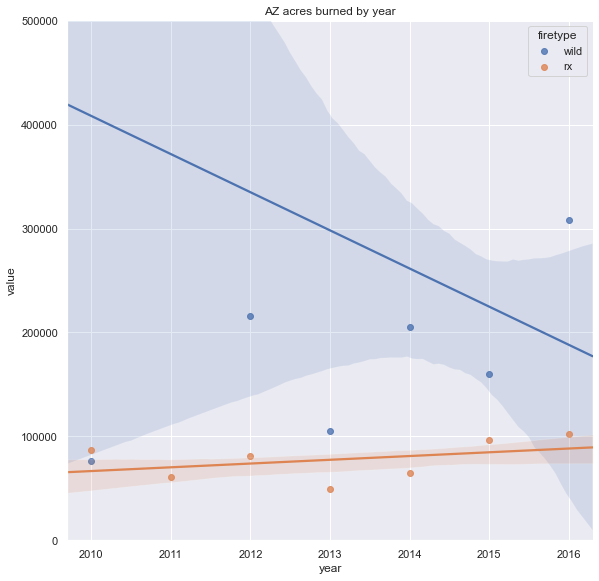

In [157]:
az = vert_all.loc[vert_all['state'] == 'AZ']
plt.figure(figsize=(30,30))
my_plot = sns.lmplot(data=az.loc[az['metric']=='acres'], x='year', y='value', hue='firetype',
          legend_out=False, truncate=False, ci = 70, size=8)
my_plot.set(ylim=(0, 500000), title='AZ acres burned by year', )
plt.show();

# Just CA, annual summ.
Using dataset from beginning of data gathering, _may differ from info in above file_.  Recommend using the above imports: this one is downloaded from CALfire when I wanted to do some EDA, but the above masterfile contains all States (of interest).  Leaving in as examples of potential visualizations.  Some subplots / facetplots with States next to each other could be informative.

In [4]:
ca_annual = pd.read_csv('../scratch_data/ca_annual_fires.csv')

In [5]:
ca_annual 

,year,wildfire_ct,wildfire_acre,rx_ct,rx_acre
0,2010,6554,109529,970,72565
1,2011,7989,126854,682,59237
2,2012,7950,869599,632,56830
3,2013,9907,577675,542,48544
4,2014,7865,555044,515,36997
5,2015,8745,893362,617,46829
6,2016,7349,560815,501,46953


In [6]:
ca_vert = pd.melt(ca_annual, id_vars=['year'], value_vars=['wildfire_ct', 'wildfire_acre',
                                                           'rx_ct','rx_acre'],
                 var_name='measure', value_name='value')

In [7]:
ca_vert[['firetype', 'metric']] = ca_vert.measure.str.split('_', expand=True)

In [8]:
ca_vert.drop('measure', inplace=True, axis=1)
ca_vert = ca_vert[['year','firetype','metric','value']]
ca_vert

,year,firetype,metric,value
0,2010,wildfire,ct,6554
1,2011,wildfire,ct,7989
2,2012,wildfire,ct,7950
3,2013,wildfire,ct,9907
4,2014,wildfire,ct,7865
5,2015,wildfire,ct,8745
6,2016,wildfire,ct,7349
7,2010,wildfire,acre,109529
8,2011,wildfire,acre,126854
9,2012,wildfire,acre,869599


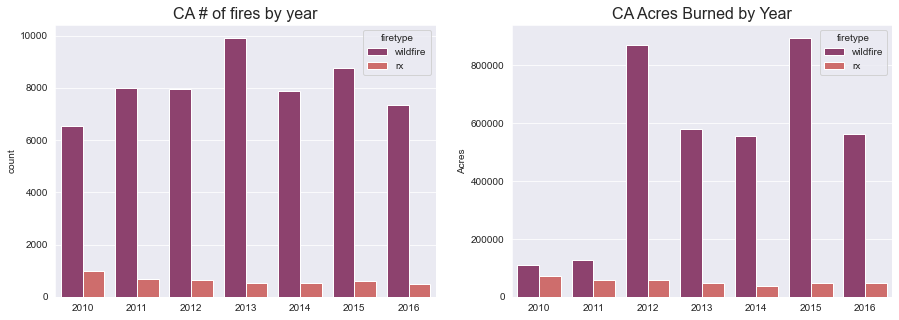

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(ax=ax[0], data=ca_vert.loc[ca_vert['metric']=='ct'], x='year', y='value', 
            hue='firetype', palette = 'flare_r')
ax[0].set_title("CA # of fires by year", size=16)
ax[0].set(xlabel='', ylabel='count');

sns.barplot(ax=ax[1], data=ca_vert.loc[ca_vert['metric']=='acre'], x='year', y='value', 
            hue='firetype', palette = 'flare_r')
ax[1].set_title('CA Acres Burned by Year', size=16)
ax[1].set(xlabel='', ylabel='Acres');


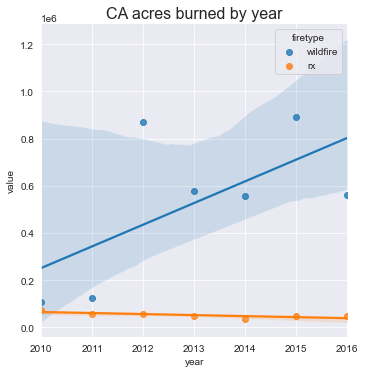

In [10]:
sns.lmplot(data=ca_vert.loc[ca_vert['metric']=='acre'], x='year', y='value', hue='firetype',
          legend_out=False)
plt.title('CA acres burned by year', size=16);

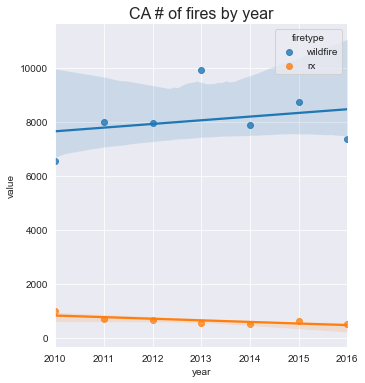

In [12]:
sns.set_style('darkgrid')
sns.lmplot(data=ca_vert.loc[ca_vert['metric']=='ct'], x='year', y='value', hue='firetype',
          legend_out=False)
plt.title('CA # of fires by year', size=16);